**Study Summary**

Pymaceuticals Inc. specializes in anti-cancer drug regimens. Recently, Pymaceuticals began looking for treatments for squamous cell carcinoma (SCC). In this study, 249 mice were identified as having an SCC growth. Each mouse was subjected to one of 10 different drugs of the course of 45 days. Tumor growth was observed, measured, and recorded at equal increments time period of the course of the drug trial. The researchers were particualarly interested in the drug Capomulin in comparison with the other drugs in the study. 

**Data Observations**

* Althouth the analysis below does not run any tests comparing the differences between male and females in tumor growth, the nearly even distribution of males and females observed in the total population of mice in this study and in the smaller samples of each drug trial sets, strengthens the generalizability of the results of the study. 

* There is a strong positive relationship (r = .84) between the average tumor size of the mouse and the mouse's weight. This relationship was also confirmed by the regression analysis. 

* Out of the top four drugs (Capomulin, Ramicane, Infubinol, and Ceftamin) only one drug, Infubinol, presented outliers in the data set. 

* The mean and standard deviation of the overall tumor size for each drug grouping of mice needs to be considered when interpreting the results of the study. For example the drugs Capomulin and Ramicane had the smallest average tumor sizes overall and also the smallest standard deviations, indicating the the tumor sizes of the mice in these groups were closer in size to each other than the mice in the other drug trial groups. In addition the medians of the overall tumor sizes for these two drugs were also very close to mean, again indicating that there was minimal variance in the overall tumor sizes among the mice in these drug trial groups. These measures seem to support the idea that the mice in the Capomulin and Ramicane groups lived longer and saw overall smaller ending tumor sizes than the mice in other drug groups.


In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [162]:
#CSV file paths
MouseData_csv = "/users/rebeccatast/desktop/Pymaceuticals-Inc./Resources/MouseData.csv"
StudyResults_csv = "/users/rebeccatast/desktop/Pymaceuticals-Inc./Resources/StudyResults.csv"

In [163]:
#Read Files
MouseData = pd.read_csv(MouseData_csv)
StudyResults = pd.read_csv(StudyResults_csv)

In [164]:
#Print first lines of Mouse Dataset
MouseData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [165]:
#Print first lines of Study Results Dataset
StudyResults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [166]:
#Merge datasets and print total number of rows
complete_data_df= pd.merge(MouseData, StudyResults,on = "Mouse ID", how = "left")
print(len(complete_data_df))


#Total Number of Mice
total_mice = len(complete_data_df["Mouse ID"].unique())
print(total_mice)
complete_data_df.head()

1893
249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [167]:
#Scrub Data to Remove Duplicate Mice and Timeframes
cleaned_complete_data_df = complete_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep ="last")
print(len(cleaned_complete_data_df))

#Total Number of Mice
total_mice_clean = len(cleaned_complete_data_df["Mouse ID"].unique())
print(total_mice_clean)

#Unique Mice 
df_unique=pd.unique(cleaned_complete_data_df["Mouse ID"])
len(df_unique)

unique_mice=cleaned_complete_data_df.drop_duplicates(subset =["Mouse ID", "Drug Regimen"]).copy()
len(unique_mice)
unique_mice.head(294)


1888
249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [168]:
#Summary Data for Drug Regimen - mean, median, mode, variance, standard deviation, standard error of the mean

#Create inital summary table with Drug Regimes and counts
summarystats = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen").count())

#Use groupby to create summary stats by drug regimen, add results into columns in summarystats

summarystats["Mean"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map("{:.2f}".format))
summarystats["Median"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map("{:.2f}".format))
summarystats["Standard Deviation"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map("{:.2f}".format))
summarystats["Variance"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map("{:.2f}".format))
summarystats["SEM"] = pd.DataFrame(cleaned_complete_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map("{:.2f}".format))

#Clean up columns
summarystats = summarystats[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


summarystats.head(11)



,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.38,50.78,6.57,43.22,0.53
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


In [169]:
#Group Drug Regimen by Tumor Volume with means
cleaned_complete_data_df.groupby("Drug Regimen")
group_by_data = cleaned_complete_data_df.groupby("Drug Regimen")
summary_drug = group_by_data["Tumor Volume (mm3)"].mean().to_frame()
summary_drug.head(11)


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.382993
Ramicane,40.216745
Stelasyn,54.233149


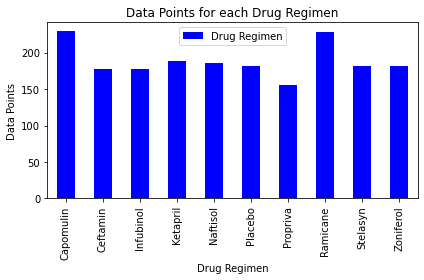

In [170]:
# Bar Graph using Pandas
# First create a dataframe grouping by the 'Drug Regimen' column
drug_regimen = cleaned_complete_data_df.groupby("Drug Regimen")

# Count the number of data points for each Drug Regimen
drug_regimen_count = pd.DataFrame(drug_regimen["Drug Regimen"].count())

# Create a bar chart based off of the group series from before and label the title
count_chart = drug_regimen_count.plot(kind='bar', title="Data Points for each Drug Regimen", color="blue", width = 0.50)

# Set the xlabel and ylabel 
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Data Points")
plt.tight_layout()

plt.show()

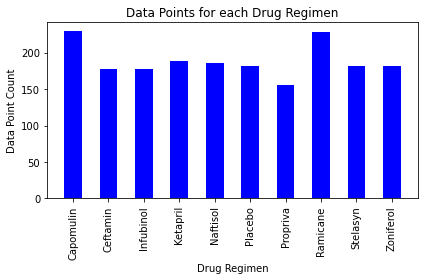

In [171]:
#Bar Graph using pyplot
x_axis = np.arange(len(drug_regimen_count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, drug_regimen_count["Drug Regimen"], color = "b", align = "center", width = 0.50)
plt.xticks(tick_locations, drug_regimen_count.index.values, rotation = "vertical")

# Set a title for the chart
plt.title("Data Points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Point Count")

plt.tight_layout()
plt.show()


In [172]:
#Unique Mice 
df_unique=pd.unique(cleaned_complete_data_df["Mouse ID"])
len(df_unique)

unique_mice=cleaned_complete_data_df.drop_duplicates(subset =["Mouse ID", "Drug Regimen"]).copy()
len(unique_mice)
unique_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [173]:
#Sort Data by Mouse Sex (gives all data points for each mouse)
mf= cleaned_complete_data_df.loc[:,"Sex"]
mf2 = mf.value_counts()
mf2

print(cleaned_complete_data_df["Sex"].value_counts()["Male"])
print(cleaned_complete_data_df["Sex"].value_counts()["Female"])

958
930


In [174]:
#Sort Data by Unique Mouse Sex (shows only unique mice, not duplicates)
true_mf1 = unique_mice.loc[:, "Sex"]
true_mf2 = true_mf1.value_counts()
true_mf2

Male      125
Female    124
Name: Sex, dtype: int64

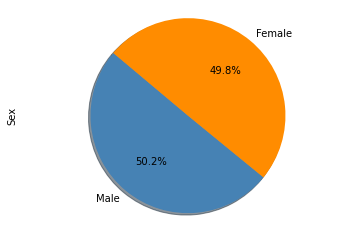

In [175]:
#Pie Chart Using Pyplot
#Data
sex = ["Male", "Female"]
numbers = [125,124]
colors = ["steelblue","darkorange"]
explode = (0,0)

#Create Pie Chart Using the Above Data
plt.ylabel("Sex")
plt.pie(numbers, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

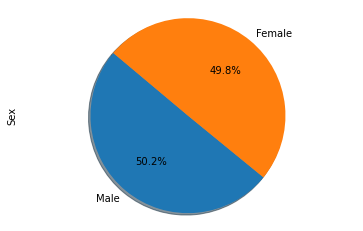

In [176]:
#Pie Chart Using Pandas
true_mf2.plot(kind="pie",shadow = True, startangle=140,figsize=(6,4), autopct='%1.1f%%')
plt.axis("equal")
plt.show()

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_complete_data_df.loc[cleaned_complete_data_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_complete_data_df.loc[cleaned_complete_data_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_complete_data_df.loc[cleaned_complete_data_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_complete_data_df.loc[cleaned_complete_data_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
#Capomulin Last Tumor Volume
Capomulin_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_tvol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_tvol,cleaned_complete_data_df, on=("Mouse ID", "Timepoint"), how ="left")
Capomulin_merge.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [178]:
#Quartiles and IQR for Capomulin
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [179]:
#Ramicane Last Tumor Volume
Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_tvol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_tvol,cleaned_complete_data_df, on=("Mouse ID", "Timepoint"), how ="left")
Ramicane_merge.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [180]:
#Quartiles and IQR for Ramicane
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [181]:
#Infubinol Last Tumor Volume
Infubinol_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_tvol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_tvol,cleaned_complete_data_df, on=("Mouse ID", "Timepoint"), how ="left")
Infubinol_merge.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [182]:
#Quartiles and IQR for Infubinol
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [183]:
#Ceftamin Last Tumor Volume
Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_tvol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_tvol,cleaned_complete_data_df, on=("Mouse ID", "Timepoint"), how ="left")
Ceftamin_merge.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [184]:
#Quartiles and IQR for Ceftamin
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


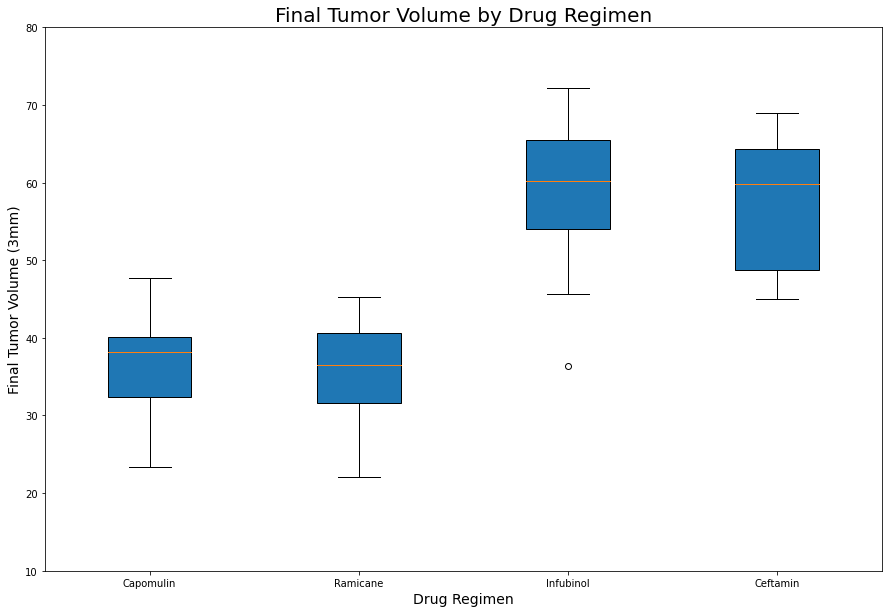

In [185]:
# Generate a box plot of the final tumor volume for the four drugs
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Final Tumor Volume by Drug Regimen",fontsize =20)
ax1.set_ylabel("Final Tumor Volume (3mm)",fontsize = 14)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()

In [186]:
#Line Plot for Capomulin Mouse
#First find the data for selected mouse

line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185",:]
line_plot_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


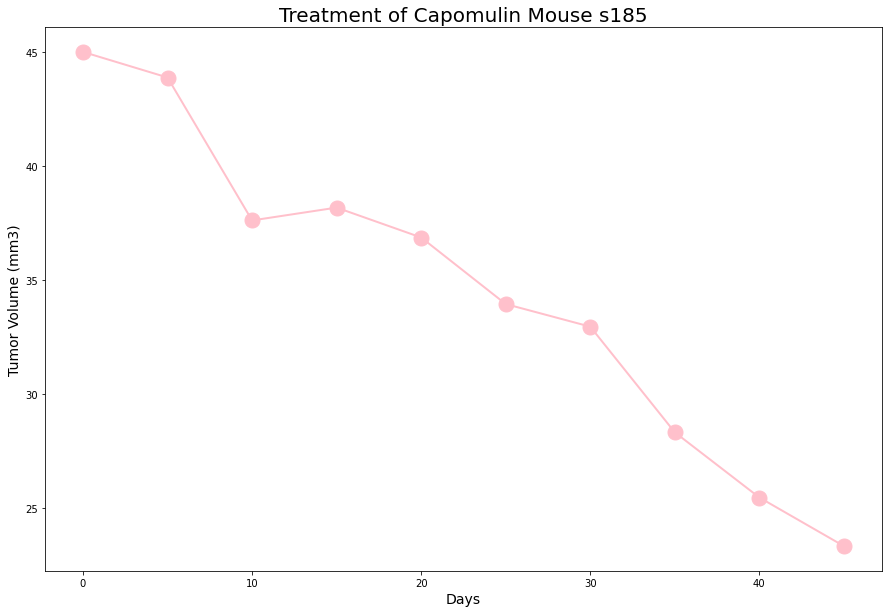

In [191]:
time_x = line_plot_df["Timepoint"]
tumvol = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title("Treatment of Capomulin Mouse s185",fontsize =20)
plt.plot(time_x, tumvol, linewidth=2, markersize=15,marker="o",color="pink", label="Fahreneit")
plt.xlabel("Days",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)


plt.show()

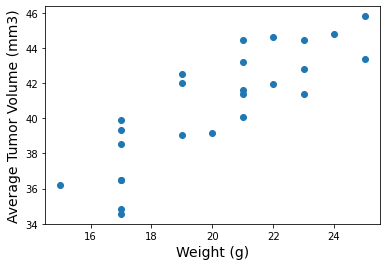

In [188]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_avg_tumvol = Capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg_tumvol["Weight (g)"], cap_avg_tumvol ["Tumor Volume (mm3)"]) 
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 14)
plt.show()

In [189]:
# Calculate the correlation coefficient 
correlation = round(st.pearsonr(cap_avg_tumvol["Weight (g)"], cap_avg_tumvol ["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation coefficient between Average Tumor Volume and Weight for the Capolumin drug regimen is {correlation}")

The correlation coefficient between Average Tumor Volume and Weight for the Capolumin drug regimen is 0.84


In [190]:
#Linear Regression Model
x_values = cap_avg_tumvol["Weight (g)"]
y_values = cap_avg_tumvol ["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print (f"slope: {slope}")
print (f"intercept: {intercept}")
print (f"rvalue (Correlation Coefficient): {rvalue}")
print (f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)


slope: 0.9544396890241045
intercept: 21.552160532685015
rvalue (Correlation Coefficient): 0.8419363424694718
stderr:0.1275435903320134
y = 0.95x + 21.55


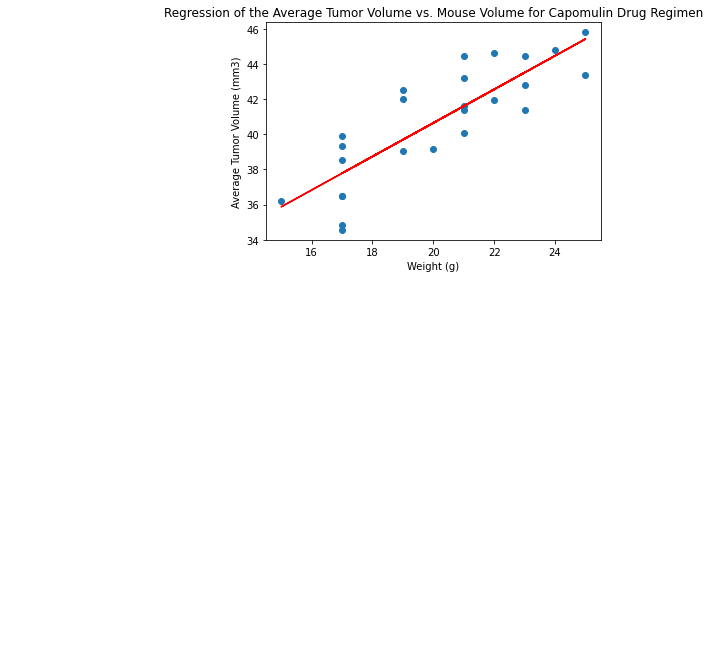

In [160]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title ("Regression of the Average Tumor Volume vs. Mouse Volume for Capomulin Drug Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()